In [1]:
import sys
import os
sys.path.append('..')
os.chdir('..')

import torch
from model.metrics import getDiceAcc, getJaccardAcc, getHD95Acc, getAsdAcc
from model.loss import SDMDiceLoss
from utils.util import SDF
from typing import List


from configs import CONF
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# def generate_circle_mask(size = 30, radius = 10):
#     # Create a grid of coordinates
#     y = torch.linspace(-1, 1, size)
#     x = torch.linspace(-1, 1, size)
#     yy, xx = torch.meshgrid(y, x)
#     distance_from_center = torch.sqrt(xx**2 + yy**2)
#     mask = distance_from_center <= (radius / size * 2)
#     plt.imshow(mask.detach().cpu().numpy(), cmap ='gray')
#     return mask.to(torch.float32).unsqueeze(0).unsqueeze(0)


# def generate_triangular_mask(size = 25):
#     mask = torch.zeros((1, 1, size, size), dtype=torch.float32)
#     mask = torch.triu(mask + 1)
#     print(mask.shape)
#     plt.imshow(mask[0][0].detach().cpu().numpy(), cmap ='gray')
#     return mask

In [14]:
def plotter(X: torch.Tensor, Y: List[torch.Tensor]):

    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_xticks(np.arange(-10, 10, 1))
    ax.set_xticks(np.arange(-10, 10, 0.5), minor=True)
    ax.set_yticks(np.arange(-1, 1.5, 0.2))
    ax.set_yticks(np.arange(-1, 1.5, 0.1), minor=True)

    ax.grid(which='both')
    ax.grid(which='minor', linestyle='--', alpha=0.5)
    ax.grid(which='major', alpha=0.7)

    ax.axhline(0, color='red', lw = 0.5)
    ax.axvline(0, color='red', lw = 0.5)

    for y in Y:
        ax.plot(X,y)


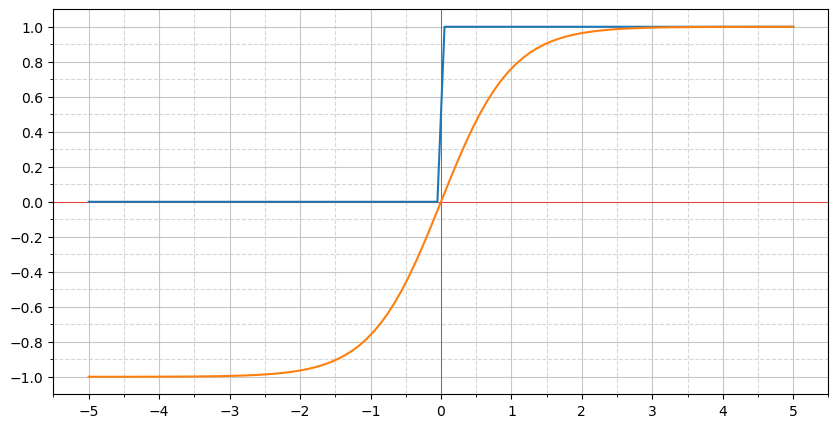

In [19]:
x = torch.tensor(np.linspace(-5,5, 100))
y = torch.sigmoid(1000*x)
# y1 = torch.relu(torch.sign(torch.sigmoid(-1*x)))
y2 = torch.tanh(x)

plotter(x, [y, y2])

In [31]:
tt = torch.randn(16,1,512,512)

In [17]:
mask = cv2.imread(f'{CONF.MASK_DATASET_PATH}/ESP_036444_2635_RED-0_4608.png', cv2.IMREAD_GRAYSCALE)
mask = torch.tensor(mask/255).unsqueeze(0).to(torch.float32)
mask = mask.repeat(16,1,1,1)
# sdm = np.load(f'{CONF.SDM_DATASET_PATH}/ESP_036444_2635_RED-0_4608.npy')

In [18]:
sdm = SDF(mask, kernel_size = CONF.SDM_KERNEL, normalize = False)

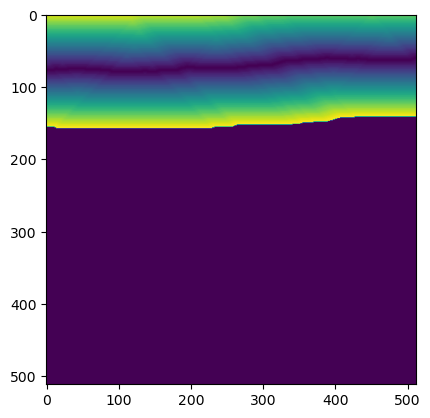

In [19]:
max_dist = (np.sqrt(2)*256)/4
sdm = torch.where(sdm < max_dist, sdm, 0)
plt.imshow(sdm[0][0].cpu().detach().numpy(), cmap ='viridis')

In [20]:



colormap = cv2.applyColorMap(((sdm/sdm.max())*255).astype(np.uint8), cv2.COLORMAP_VIRIDIS)
cv2.imwrite(f'{CONF.SDM_DATASET_PATH}/ESP_036444_2635_RED-0_4608.png', colormap)
# plt.imshow(sdm.astype(int), cmap ='viridis')

True

In [1]:
import random

In [13]:
random.seed(42)

In [24]:
random.seed(13)
print(random.randint(3,9))
print(random.randint(3,9))
print(random.randint(3,9))
print(random.randint(3,9))
print(random.randint(3,9))

5
5
8
8
9
